In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_log = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20Sales%20Log.csv")
accounts = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20Accounts.csv")

In [3]:
sales_log

,Event Name,Game Day,Game Day of Wk,Section,Row,Seat Qty,Acc #,Sale Date,Section Name,Promo Code,Comp,Current Block Price,Sale Day,Net Revenue,Unnamed: 14,Unnamed: 15
0,TML1028,2023-10-28,Sat,100,1,1,11992341,2023-10-14,Club Rinkside,NaN,N,78.25,Sat,74.52,NaN,NaN
1,TML1028,2023-10-28,Sat,100,1,1,13204621,2023-10-14,Club Rinkside,NaN,N,78.25,Sat,74.52,NaN,NaN
2,TML1028,2023-10-28,Sat,100,18,2,15827713,2023-10-28,Club Platinum,NaN,N,156.50,Sat,149.05,NaN,NaN
3,TML1028,2023-10-28,Sat,100,12,2,13425266,2023-10-28,Club Platinum,NaN,N,156.50,Sat,149.05,NaN,NaN
4,TML1028,2023-10-28,Sat,100,16,1,7834382,2023-10-25,Club Platinum,NaN,N,71.20,Wed,67.81,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25725,TML0505,2024-05-05,Sun,WC106,WC,2,17932830,2024-05-05,Defensive Corner - Upper,NaN,N,66.00,Sun,62.86,NaN,NaN
25726,TML0505,2024-05-05,Sun,WC115,WC,1,13212713,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN
25727,TML0505,2024-05-05,Sun,WC115,WC,1,16460088,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN
25728,TML0505,2024-05-05,Sun,WC115,WC,1,5412621,2024-05-05,Attacking Corner - Upper,NaN,N,43.00,Sun,40.95,NaN,NaN


In [4]:
accounts

,Acc #,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age
0,10921659.0,20.0,24.0,1597.86,Club Rinkside,East Toronto (Riverdale),M,27.0
1,2693583.0,18.0,59.0,1488.21,Family Zone,Etobicoke (Rexdale),M,41.0
2,13195933.0,18.0,42.0,2351.90,Blue Line,Etobicoke (Rexdale),M,37.0
3,11771829.0,17.0,18.0,407.38,Family Zone,Scarborough (STC),M,34.0
4,11895945.0,16.0,31.0,2495.24,Premium,West Toronto (High Park),M,19.0
...,...,...,...,...,...,...,...,...
12180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12185 entries, 0 to 12184
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Acc #                  12172 non-null  float64
 1   Games Attended         12172 non-null  float64
 2   Seat Qty               12172 non-null  float64
 3   Net Revenue            12172 non-null  float64
 4    Most Common Section   12172 non-null  object 
 5   Region                 12172 non-null  object 
 6   Gender                 12172 non-null  object 
 7   Age                    12172 non-null  float64
dtypes: float64(5), object(3)
memory usage: 761.7+ KB


In [6]:
print(accounts.columns)

Index(['Acc #', 'Games Attended', 'Seat Qty', 'Net Revenue',
       ' Most Common Section ', 'Region', 'Gender', 'Age'],
      dtype='object')


In [11]:
accounts['Most Common Section'] = accounts[' Most Common Section ']

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify object-type columns for encoding
object_cols = accounts.select_dtypes(include=['object']).columns

# Set up column transformer with OneHotEncoder for object columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), object_cols)
    ],
    remainder='passthrough'  # keep all other columns
)

# Fit and transform the data with only encoding
encoded_accounts = preprocessor.fit_transform(accounts)

# Convert the result to a DataFrame with appropriate column names
encoded_columns = preprocessor.get_feature_names_out()
encoded_accounts_df = pd.DataFrame(encoded_accounts, columns=encoded_columns)

# Display the encoded DataFrame information
print(encoded_accounts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12185 entries, 0 to 12184
Columns: 131 entries, onehot__ Most Common Section _ Attacking Corner - Upper  to remainder__Age
dtypes: float64(131)
memory usage: 12.2 MB
None


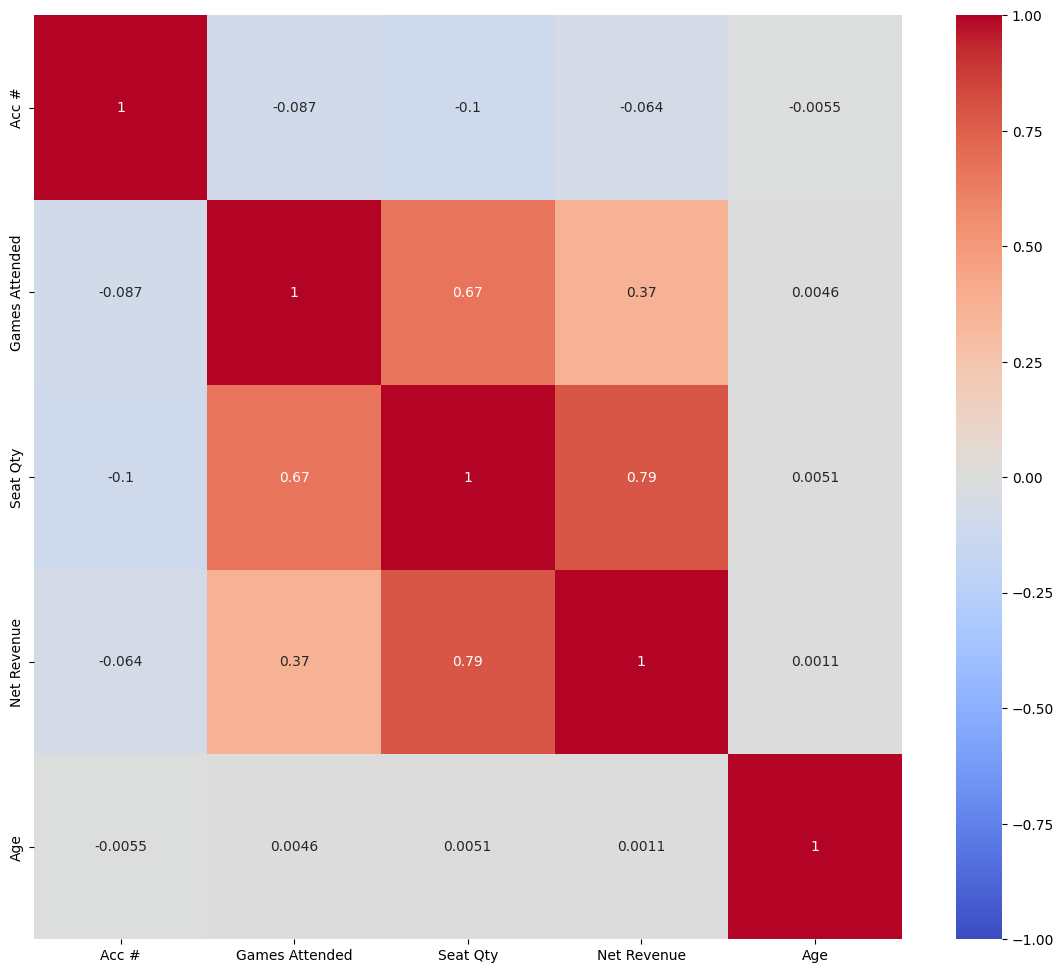

In [17]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [22]:
# Fill NaN values with the median of each column
encoded_accounts_df = encoded_accounts_df.fillna(encoded_accounts_df.median())

In [26]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(encoded_accounts_df)

minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(encoded_accounts_df)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(encoded_accounts_df)

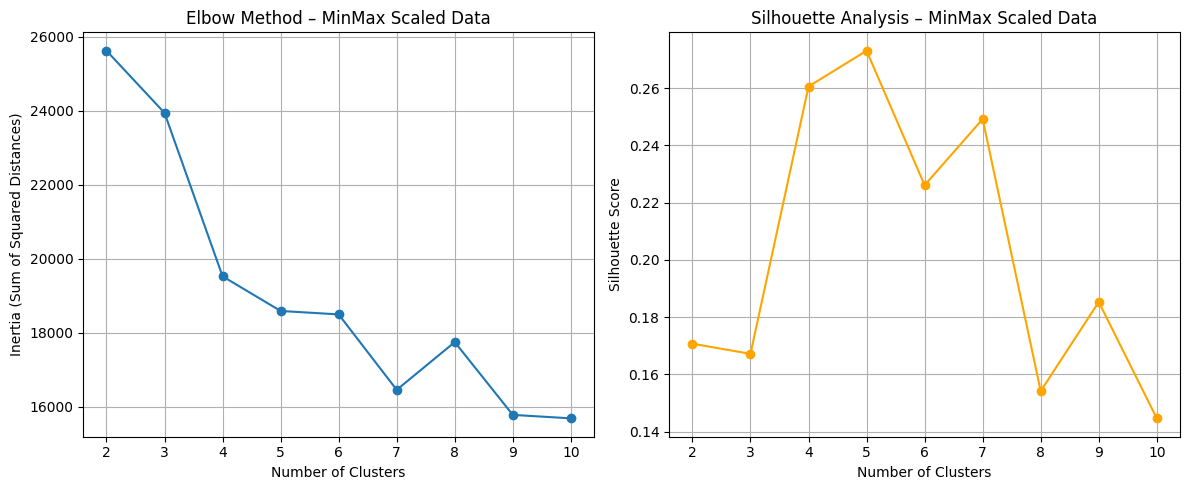

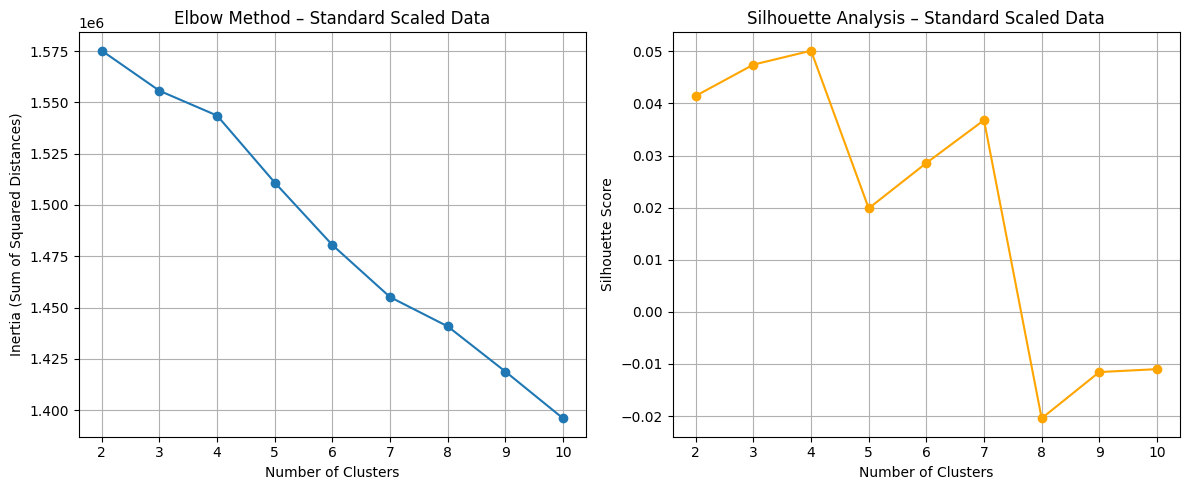

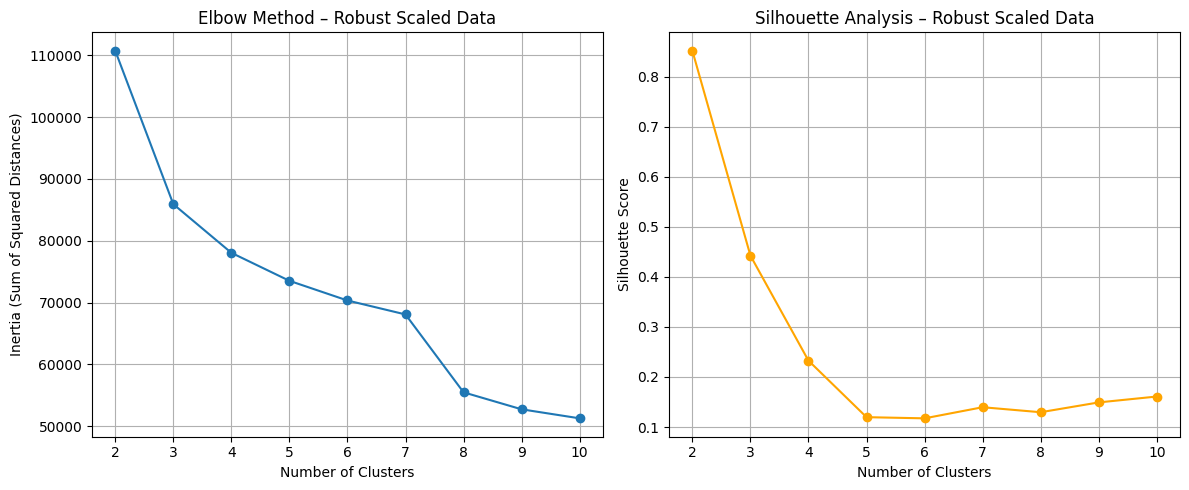

In [28]:
# Define a function to run the Elbow Method and Silhouette Analysis for a given dataset
def elbow_silhouette_analysis(scaled_data, title):
    # Range of clusters to evaluate
    range_n_clusters = range(2, 11)

    # Lists to store the results
    inertia = []  # For Elbow Method
    silhouette_scores = []  # For Silhouette Analysis

    # Loop over the range of cluster numbers
    for n_clusters in range_n_clusters:
        # Initialize KMeans model
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)

        # Elbow method: store inertia
        inertia.append(kmeans.inertia_)

        # Silhouette analysis: calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title(f"Elbow Method – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)

    # Plot Silhouette Analysis
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
    plt.title(f"Silhouette Analysis – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # Adjust Layout and display plots
    plt.tight_layout()
    plt.show()

# Run the analysis for each scaled dataset
elbow_silhouette_analysis(minmax_df, "MinMax Scaled Data")
elbow_silhouette_analysis(standard_df, "Standard Scaled Data")
elbow_silhouette_analysis(robust_df, "Robust Scaled Data")

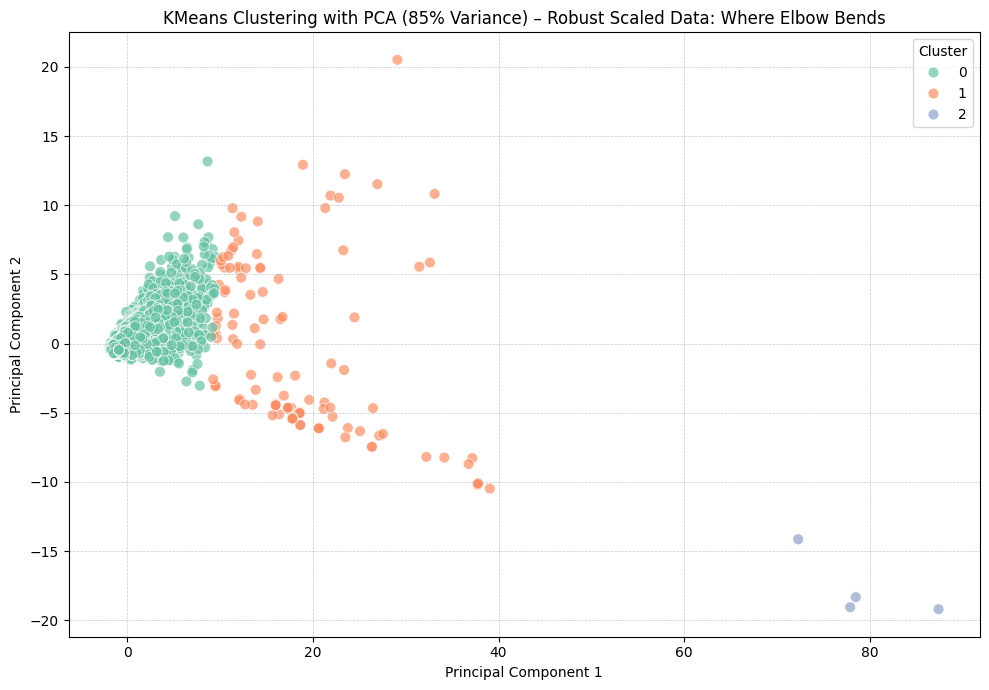

Silhouette Score: 0.85


In [31]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Where Elbow Bends")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

kmeans_with_pca_visualization_robust(robust_df, n_clusters=3) 

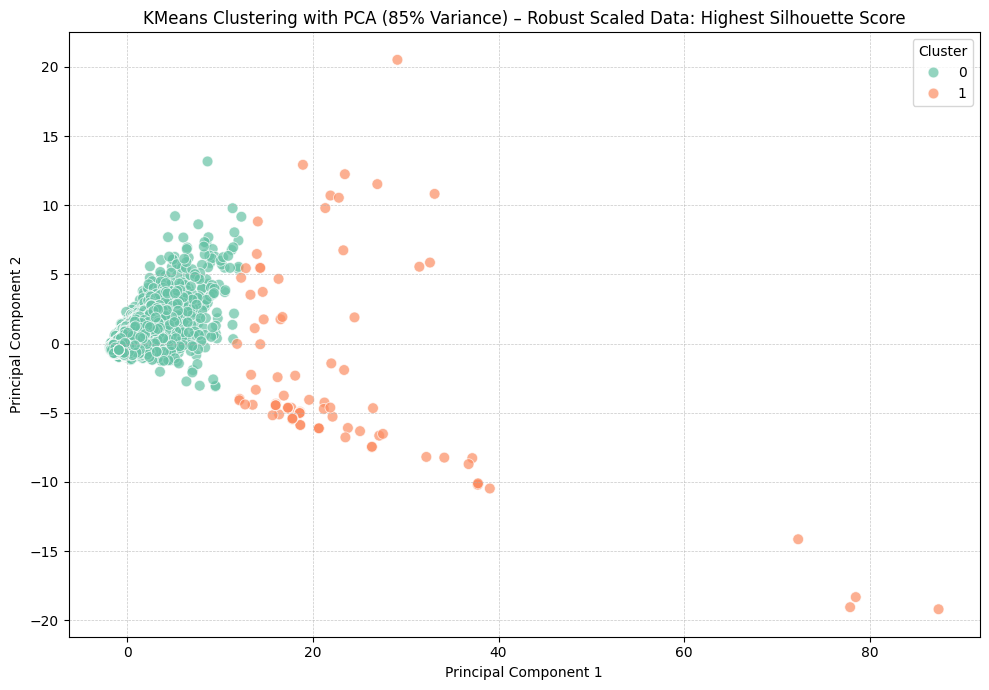

Silhouette Score: 0.88


In [32]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Highest Silhouette Score")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

kmeans_with_pca_visualization_robust(robust_df, n_clusters=2) 

In [33]:
import numpy as np
from sklearn.metrics import silhouette_score
import hdbscan

def optimize_hdbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for min_cluster_size and min_samples
    hdbscan_min_cluster_sizes = range(5, 15)
    hdbscan_min_samples_values = range(1, 7)
    
    # Dictionary to hold the datasets and titles
    hdbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_hdbscan_title = None
    best_hdbscan_min_cluster_size = None
    best_hdbscan_min_samples = None
    best_hdbscan_score = -1
    best_hdbscan_data = None  # Renamed variable to best_hdbscan_data
    
    # Iterate over each dataset
    for hdbscan_title, scaled_data in hdbscan_datasets.items():
        # Local variables to find the best for each dataset
        best_hdbscan_min_cluster_size_for_dataset = None
        best_hdbscan_min_samples_for_dataset = None
        best_hdbscan_score_for_dataset = -1
        
        # Iterate over combinations of min_cluster_size and min_samples
        for hdbscan_min_cluster_size in hdbscan_min_cluster_sizes:
            for hdbscan_min_samples in hdbscan_min_samples_values:
                # Create HDBSCAN clusterer
                clusterer = hdbscan.HDBSCAN(min_cluster_size=hdbscan_min_cluster_size, min_samples=hdbscan_min_samples)
                labels = clusterer.fit_predict(scaled_data)
                
                # Count the number of clusters (excluding noise)
                hdbscan_n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                
                # Skip configurations with fewer than two clusters
                if hdbscan_n_clusters < 2:
                    continue
                
                # Calculate the silhouette score for valid configurations
                hdbscan_sil_score = silhouette_score(scaled_data, labels)  # Renamed to avoid shadowing
                
                # Update the best score for the current dataset
                if hdbscan_sil_score > best_hdbscan_score_for_dataset:
                    best_hdbscan_min_cluster_size_for_dataset = hdbscan_min_cluster_size
                    best_hdbscan_min_samples_for_dataset = hdbscan_min_samples
                    best_hdbscan_score_for_dataset = hdbscan_sil_score
                
                # If we encounter very low clusters with high min_samples, break inner loop
                if hdbscan_n_clusters <= 2:
                    break  # Skip further min_samples for this min_cluster_size as it’s unlikely to improve
        
        # Print the best configuration for this dataset
        print(f"{hdbscan_title} - Best min_cluster_size: {best_hdbscan_min_cluster_size_for_dataset}, "
              f"Best min_samples: {best_hdbscan_min_samples_for_dataset}, Silhouette Score: {best_hdbscan_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_hdbscan_score_for_dataset > best_hdbscan_score:
            best_hdbscan_title = hdbscan_title
            best_hdbscan_min_cluster_size = best_hdbscan_min_cluster_size_for_dataset
            best_hdbscan_min_samples = best_hdbscan_min_samples_for_dataset
            best_hdbscan_score = best_hdbscan_score_for_dataset
            best_hdbscan_data = scaled_data 

    # Return the best configuration across all datasets
    return best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_score, best_hdbscan_title

# Use the function to process all three datasets at once
best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_score, best_hdbscan_title = optimize_hdbscan_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_hdbscan_title}, Min Cluster Size: {best_hdbscan_min_cluster_size}, Min Samples: {best_hdbscan_min_samples}, Silhouette Score: {best_hdbscan_score}")

MinMax Data - Best min_cluster_size: 5, Best min_samples: 4, Silhouette Score: 0.5413693294688114


KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hdbscan

# Function to visualize the best HDBSCAN clusters with optimized PCA
def visualize_best_hdbscan_clusters_optimized_pca(best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_title):
    # Perform HDBSCAN with the best parameters
    clusterer = hdbscan.HDBSCAN(min_cluster_size=best_hdbscan_min_cluster_size, min_samples=best_hdbscan_min_samples)
    labels = clusterer.fit_predict(best_hdbscan_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_hdbscan_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_hdbscan_data)
    
    # Determine if 2D or 3D visualization is possible
    if pca_data.shape[1] >= 3:
        # Use 3 components for 3D visualization if possible
        pca_3d_data = pca_data[:, :3]
        pca_2d_data = pca_data[:, :2]
    else:
        # If only 2 components, use for both visualizations
        pca_2d_data = pca_data
        pca_3d_data = None  # Not enough dimensions for 3D
    
    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use the 'plasma' colormap, which does not have brown
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "green"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_2d_data[labels == label, 0], 
            pca_2d_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"HDBSCAN Clustering on {best_hdbscan_title} (min_cluster_size={best_hdbscan_min_cluster_size}, "
              f"min_samples={best_hdbscan_min_samples}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "green"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"HDBSCAN Clustering on {best_hdbscan_title} (min_cluster_size={best_hdbscan_min_cluster_size}, "
                     f"min_samples={best_hdbscan_min_samples}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs, including the labels
    return silhouette_avg, n_clusters, n_noise, labels

# Function to characterize clusters based on the clustering labels
def characterize_clusters(data, labels):
    # Convert to DataFrame if necessary
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
    
    # Add the labels as a new column
    data['Cluster'] = labels
    
    # Group by cluster and calculate mean for each feature
    cluster_characteristics = data.groupby('Cluster').mean()
    
    # Count the number of points in each cluster
    cluster_sizes = data['Cluster'].value_counts().sort_index()
    
    # Add the size of each cluster as a new column
    cluster_characteristics['Cluster Size'] = cluster_sizes

    # Reset index for better readability
    cluster_characteristics.reset_index(inplace=True)

# Call the function using the best configuration from optimize_hdbscan_all
silhouette_avg, num_clusters, num_noise_points, labels = visualize_best_hdbscan_clusters_optimized_pca(
    best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")